# Linear Regression

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load required modules. Each time you start your server, you will need to execute this cell again to load the modules.

1. If the question asks you write code then write concise code to solve the problem
2. If the questions ask you to make a plot then make simple legible plots with labeled axes
2. If the question asks for your comments then you need to write what you learned from looking at the output of the code, model, or plot

When you finish, save the file with all of the code executed and plots created and reupload to canvas


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


%cd /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/STAT335/Homework/Homework 2



# Question 1 - House price prediction

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

Then meaning of some selected variables.

* id: a notation for a house
* date: the date house was sold
* price: price of the house
* bedrooms: number of bedrooms
* bathrooms: number of bathrooms/bedrooms
* sqftliving: square footage of the home
* zipcode: zip code
* condition: how good the condition is overall. 1 indicates worn out property and 5 excellent.

In [ ]:
dataset = pd.read_csv("kc_house_data.csv")
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Question 1.1.** How many covariate variables (id and date are not covariate variables)? How many samples?



After you call shape on the dataset you can see there are 21 attributes/covariates so if we don't count id and date that leaves **19**.

There are **21613** samples.

In [ ]:
dataset.shape

(21613, 21)

**Question 1.2.** Create a new dataframe with the target variable `price` and the following covariates: `bedrooms`, `bathrooms`, `sqft_living`, `zipcode`,`condition`. Convert `price` to be in terms of 1000s of dollars, i.e.  price = price/1000.

In [ ]:
updated_data_set = dataset[['price','bedrooms','bathrooms','sqft_living','zipcode','condition']]
#dataset['price'] = dataset['price'].apply(lambda x: x / 1000)

updated_data_set['price'] = updated_data_set['price']/1000

updated_data_set.head()



,price,bedrooms,bathrooms,sqft_living,zipcode,condition
0,221.9,3,1.00,1180,98178,3
1,538.0,3,2.25,2570,98125,3
2,180.0,2,1.00,770,98028,3
3,604.0,4,3.00,1960,98136,5
4,510.0,3,2.00,1680,98074,3


**Question 1.4.** For each categorical variable, print out the number of categories.

In [ ]:
print("Number of categories in zipcode:", updated_data_set['zipcode'].nunique())
print("Number of categories in condition:", updated_data_set['condition'].nunique())


Number of categories in zipcode: 70
Number of categories in condition: 5


**Question 1.5.** Print a covariance matrix between all variables (including price) and create a pair plot (see linear regression notes). State which variable is most correlated with price and which is least correlated.

In [ ]:
# covariance

cov_matrix = updated_data_set.cov()
cov_matrix


,price,bedrooms,bathrooms,sqft_living,zipcode,condition
price,134782.378397,105.286276,148.481496,236715.431307,-1045.071663,8.687030
bedrooms,105.286276,0.865015,0.369527,492.596040,-7.597239,0.017232
bathrooms,148.481496,0.369527,0.593151,533.811988,-8.400840,-0.062638
sqft_living,236715.431307,492.596040,533.811988,843533.681368,-9800.232484,-35.114601
zipcode,-1045.071663,-7.597239,-8.400840,-9800.232484,2862.787835,0.105343
condition,8.687030,0.017232,-0.062638,-35.114601,0.105343,0.423467


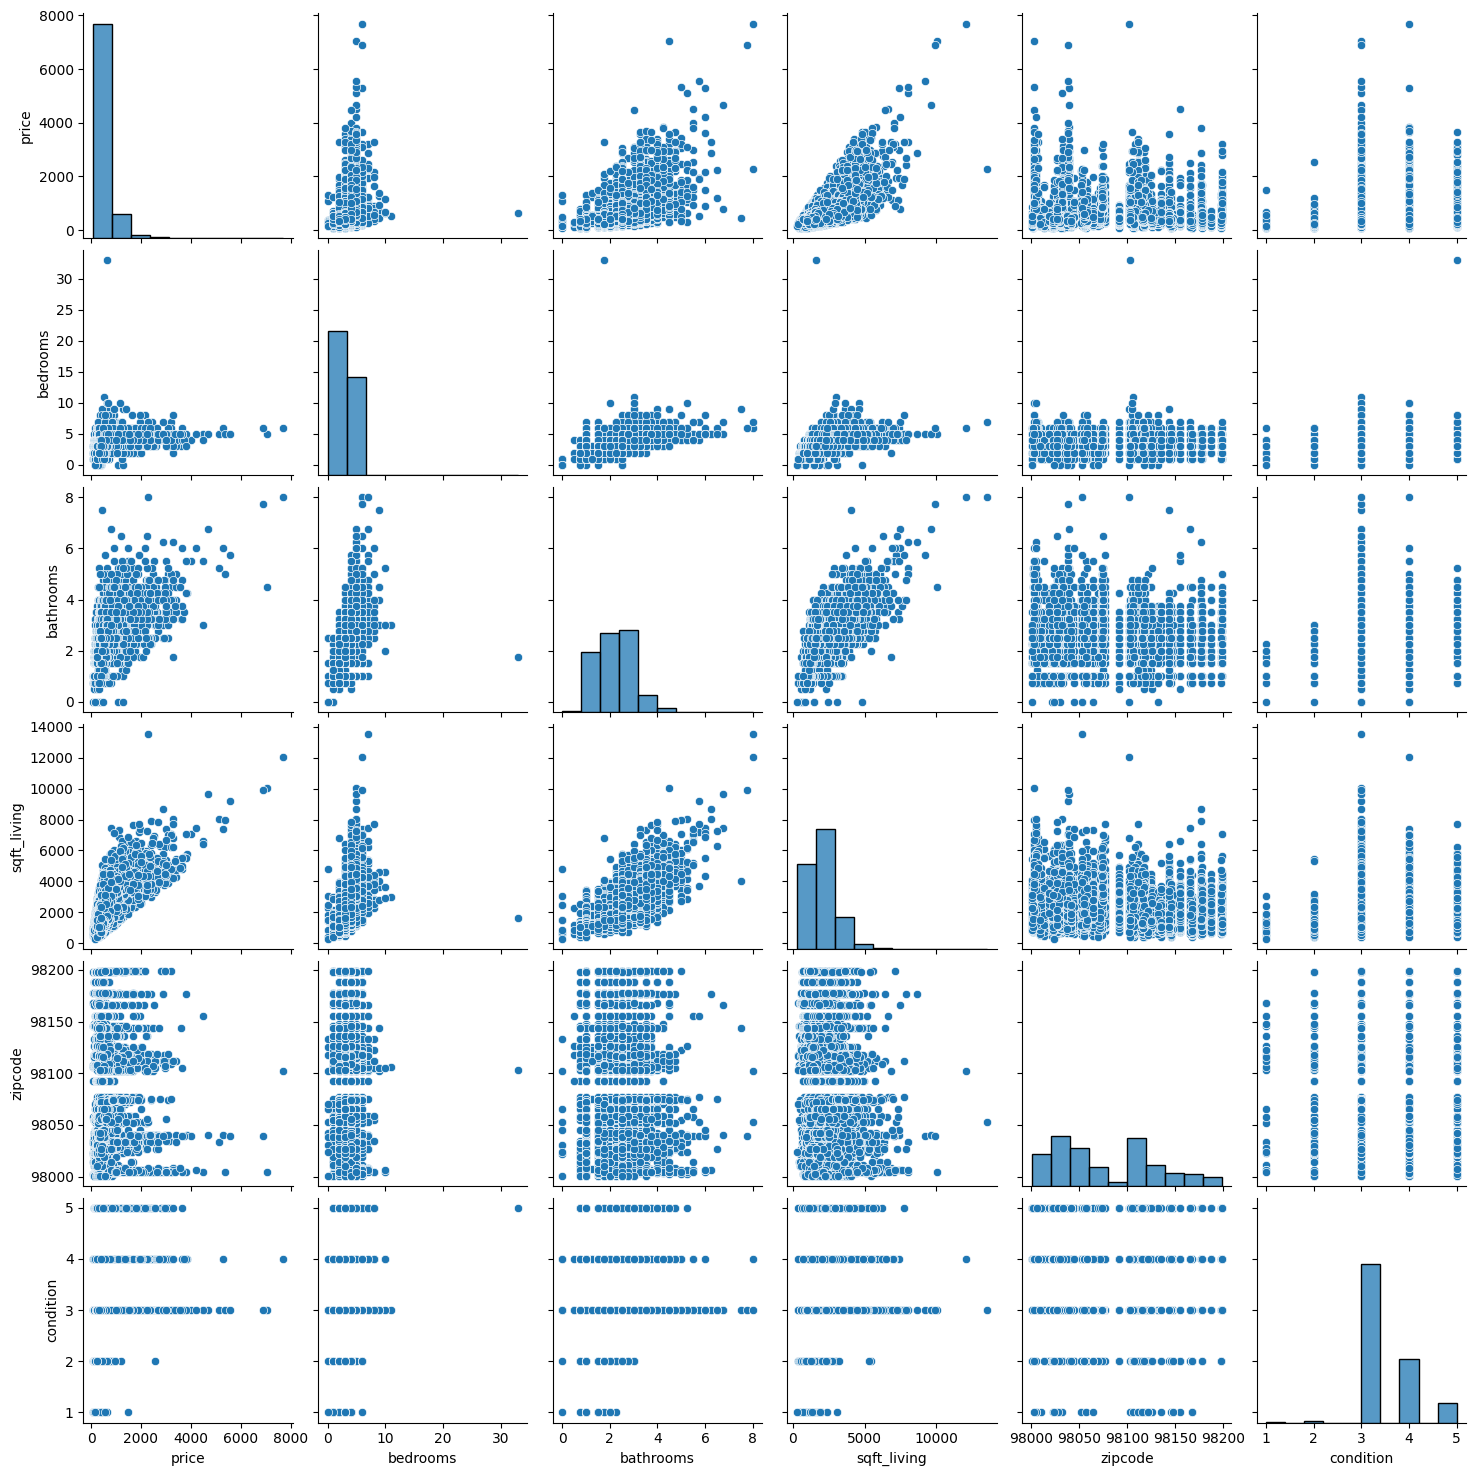

In [ ]:
# pair plot
sns.pairplot(updated_data_set, diag_kws={'bins': 10})
plt.show()

## Part 1. Simple Linear Regression

Predict `price` using the living area size `sqft_living`

**Question 2.1.** Split your data into a training and testing dataset.

In [ ]:
import random
#randomize the indices
n=updated_data_set.shape[0]# sample size = no. of observations
train_index = random.sample(range(n), round(21613*.75)) #randomly pick 75% of the indices up to n
#take the set difference between train_index and the set{1 to n}
test_index = list(set(range(n))^set(train_index))

# check that they share the empty set (have no elements in common)
set(train_index)&set(test_index) #passes test

#set up x, y, and n using the randomized indices
n_train = len(train_index)
n_test = len(test_index)

x_train=updated_data_set.loc[train_index,'sqft_living']
x_test = updated_data_set['sqft_living'][test_index]

y_train=updated_data_set.loc[train_index]['price']
y_test=updated_data_set.loc[test_index,'price']


**Question 2.2.** Use sklearn's `LinearRegression` to obtain the linear regression model.

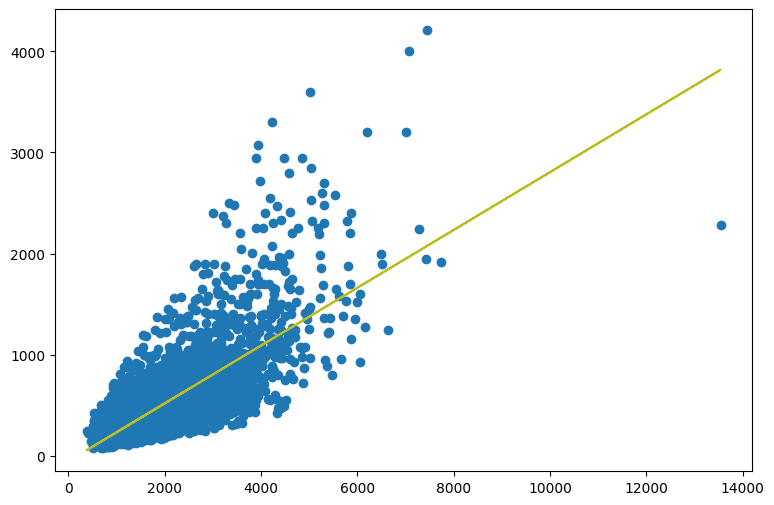

In [ ]:
from sklearn.linear_model import LinearRegression

#make linear regression object
lm=LinearRegression()

# format y and x as sklearn expects, reshape x into a 2d array

x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)

# fit the data to the model
lm.fit(x_train,y_train)

# predictions using both train and test
yhat_train = lm.predict(x_train)
yhat_test = lm.predict(x_test)

#plot the data with the prediction line
plt.figure(figsize = (9, 6))
plt.scatter(x_test, y_test)
plt.plot(x_test, yhat_test, c = 'C8');

**Question 2.3.** Print the training and testing MSE and R^2 metrics. State whether you believe (your opinion) if the model generalized well from the training to the testing dataset. You must justify your opinion.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

#training data mse and r^2
mse_train = mean_squared_error(y_train,yhat_train)
r2_train = r2_score(y_train, yhat_train)

#test data mse and r^2
mse_test = mean_squared_error(y_test, yhat_test)
r2_test=r2_score(y_test, yhat_test)

# print train and test mse and r^2
print(f"The training data mse: {mse_train} and r^2: {r2_train}")
print(f"The test(prediction) data mse: {mse_test} and r^2: {r2_test}")

The training data mse: 70719.02866363557 and r^2: 0.49550077736416
The test(prediction) data mse: 61347.15545050272 and r^2: 0.4822474732127866


About 50% of the variability in price is explained by square footage from this data. And the MSE of the test data isn't that much higher than the training data so the model generalized well from the training to the test dataset.

**Question 2.4.** Use statsmodels `ols` method to obtain the linear regression model with an intercept (check linear regression note). Display the summary statistics below. State if `sqft_living` is significant or not.

In [ ]:
import statsmodels.api as sm

#modified feature matrix with the intercept
x_train2 = sm.add_constant(x_train)
est = sm.OLS(y_train, x_train2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.592e+04
Date:                Sat, 07 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:03:34   Log-Likelihood:            -1.1351e+05
No. Observations:               16210   AIC:                         2.270e+05
Df Residuals:                   16208   BIC:                         2.270e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -53.2695      5.165    -10.313      0.0

`sqft_living` is significant because the pvalue is very low. The pvalue is less than an alpha I set of .05.
We are really checking if beta is 0 or if it is not. If ($H_0$)it is 0 it is not significant, if ($H_a$) it is anything other than 0 then it is considered significant. So we reject the null and conclude that `sqft_living` is significant since beta isn't 0.




## Part 2. Multiple regression model

**Question 3.1.** Predict `price` with `bedrooms`, `bathrooms`, and `sqft_living` again using sklearns `LinearRegression`

In [ ]:
from sklearn.model_selection import train_test_split

# select the features and target variable
features = dataset[['bedrooms', 'bathrooms', 'sqft_living']]
target = dataset['price']

# split data randomly
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# convert x and y to numpy arrays for the lm
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

# create model object
lm=LinearRegression()

#fit the training data to the model
lm.fit(x_train, y_train)

#prediction
yhat_train = lm.predict(x_train)
yhat_test = lm.predict(x_test)


**Question 3.2.** Print the training and testing MSE and R^2 metrics. State whether you believe (your opinion) if the model generalized well from the training to the testing dataset. You must justify your opinion. Also state whether this model improved over the simple linear regression.

In [ ]:

print("Train")
print('MSE -', np.mean((y_train - yhat_train)**2))
print('R2 - ', lm.score(x_train, y_train))

print("\n")
print("Test")
print('MSE -', np.mean((y_test - yhat_test)**2))
print('R2 - ', lm.score(x_test, y_test))

Train
MSE - 64516689328.09609
R2 -  0.5061816005917184


Test
MSE - 74237634953.18283
R2 -  0.50893471722649


The model generalized well from the training to the testing data set since the train MSE and the test MSE are close.

This model did **not** improve over the simple linear regression (66K and 76K MSE for training and test respectively)since the MSE was much lower.

**Question 3.2.** Use statsmodels `ols` to determine which variables are significant (ignoring issues of multiple testing). Display the summary below and state which variables are significant and why.

In [ ]:
import statsmodels.api as sm

x_train2 = sm.add_constant(x_train)
est = sm.OLS(y_train, x_train2)
est2 = est.fit()
print(est2.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     5906.
Date:                Sat, 07 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:03:34   Log-Likelihood:            -2.3971e+05
No. Observations:               17290   AIC:                         4.794e+05
Df Residuals:                   17286   BIC:                         4.795e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.988e+04   7601.138      9.194      0.0

Given: $\alpha =.05$

Because  >|t| is under .05 for all 3 predictors, they are all statistically significant given each of them.

## Part 3. Regress on zip code

**Question 4.1.** Revise your answer of **Question 1.3.**. The zipcode is a nominal variable whose values are represented by numbers. In this section, we want to divide the county into two parts based on zipcode. Create a new column named `area`. If the `zipcode` is no more than 98100, its area = 0; If the `zipcode` is larger than 98100, we let area = 1.  

In [ ]:
# function to determine the 'area' based on 'zipcode'
def assign_area(zipcode):
    if zipcode <= 98100:
        return 0
    else:
        return 1

# Apply the function to create the 'area' column
updated_data_set['area'] = updated_data_set['zipcode'].apply(assign_area)

print(updated_data_set.head())

   price  bedrooms  bathrooms  sqft_living  zipcode  condition  area
0  221.9         3       1.00         1180    98178          3     1
1  538.0         3       2.25         2570    98125          3     1
2  180.0         2       1.00          770    98028          3     0
3  604.0         4       3.00         1960    98136          5     1
4  510.0         3       2.00         1680    98074          3     0


**Question 4.2.** Predict `price` with `area`. Print the training and testing MSE and R2. State whether you believe (your opinion) if the model generalized well from the training to the testing dataset. You must justify your opinion.

In [ ]:
# choose feature and target
features = updated_data_set[['area']]
target = updated_data_set['price']

# Split data randomly
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Convert x and y to numpy arrays for the linear regression model
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create a linear regression model object
lm = LinearRegression()

# Fit the training data to the model
lm.fit(x_train, y_train)

# Predictions
yhat_train = lm.predict(x_train)
yhat_test = lm.predict(x_test)

print("Train")
print('MSE -', np.mean((y_train - yhat_train)**2))
print('R2 -', lm.score(x_train, y_train))

print("\n")
print("Test")
print('MSE -', np.mean((y_test - yhat_test)**2))
print('R2 -', lm.score(x_test, y_test))


Train
MSE - 130632.32602562722
R2 - 0.0001246681939796046


Test
MSE - 151283.27158582248
R2 - -0.0007048660297945819


The model did not generalize well because the training data has $R^2$ is nearly 0. The regression did not explain much of the variability in the response. \

**Question 4.3.** We want to refine the area, so we divide the county into four parts based on zipcode. Create a new column named `area2`. area2 = 0 if zipcode <= 98050; area2 = 1 if 98050 < zipcode <=98100; area3 = 2 if 98100 < zipcode <=98150; area2 = 3 if zipcode > 98150.

In [ ]:

# function to determine the area2 based on zipcode
def assign_area2(zipcode):
    if zipcode <= 98050:
        return 0
    elif 98050 < zipcode <= 98100:
        return 1
    elif 98100 < zipcode <= 98150:
        return 2
    else:
        return 3

# Apply the function to create the 'area2' column
updated_data_set['area2'] = updated_data_set['zipcode'].apply(assign_area2)

# check for new column
print(updated_data_set.head())


   price  bedrooms  bathrooms  sqft_living  zipcode  condition  area  area2
0  221.9         3       1.00         1180    98178          3     1      3
1  538.0         3       2.25         2570    98125          3     1      2
2  180.0         2       1.00          770    98028          3     0      0
3  604.0         4       3.00         1960    98136          5     1      2
4  510.0         3       2.00         1680    98074          3     0      1


**Question 4.3.**  Predict `price` with `area`. Print the training and testing MSE and R2. State whether you believe (your opinion) if the model generalized well from the training to the testing dataset. You must justify your opinion.

In [ ]:
# choose feature and target variable
features = updated_data_set[['area2']]
target = updated_data_set['price']

# Split data randomly
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Convert x and y to numpy arrays for the linear regression model
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create a linear regression model object
lm = LinearRegression()

# Fit the training data to the model
lm.fit(x_train, y_train)

# Predictions
yhat_train = lm.predict(x_train)
yhat_test = lm.predict(x_test)

print("Train")
print('MSE -', np.mean((y_train - yhat_train)**2))
print('R2 -', lm.score(x_train, y_train))

print("\n")
print("Test")
print('MSE -', np.mean((y_test - yhat_test)**2))
print('R2 -', lm.score(x_test, y_test))

Train
MSE - 130501.77855142576
R2 - 0.001123894059850028


Test
MSE - 151097.62437305847
R2 - 0.0005231485896040056


$R^2$ is virtually 0 so almost none of the variablility in price is explained by area2. Overall, the model did not generalize well.

# Question 2 - Consistency of beta

Now, we will investigate some statistical properties of linear regression. We will show that
1. Parameter estimates tend to improve with more data
2. A linear model is unbiased when the data is truly linear
3. Variance decreases with increasing sample size

Unlike in question 1, where data is provided, this question will involve simulating our own data. We do this so that we can check statistical properties through repeated simulation. Our interest is in uncovering properties of the linear model that hold up across many different datasets.




In [ ]:
from sklearn.linear_model import LinearRegression

## Part 1. Consistency of the betas

Suppose we observe (or generate) some data that is truly a linear combination of $p$ features. That is $y$ is in actuality generated by an (unknown) linear combination of $x_1$, $x_2$, ..., $x_p$ plus error. We can write any observation $y_i$ as
$$
y_i = x_{i, 1} \beta_1 + x_{i, 2} \beta_2 + ... x_{i, p} \beta_p + \epsilon
$$
where $x_{i, 1}$ means the $i$th observation of variable $x_1$,  $x_{i, 2}$ means the $i$th observation of variable $x_2$, and so on and so forth. If $Y = [y_1,...,y_n]$ is a column of $n$ targets, $X$ is data matrix with $n$ rows and $p$ columns, $\beta = [\beta_1,...,\beta_p]$ is our coefficient vector, then we can write this in shorthand as
$$
Y = X \beta + \epsilon
$$
to represent the above equation applied to every observation in $i = 1,2,...,n$.
 - _Note that $X \beta$ can be computed in python as_ `x @ beta`.

Suppose we fit a linear model to data that is truly generated by a linear combination of the features and estimate our coefficient matrix $\hat \beta$. A natural question to ask is how accurate is $\hat \beta$? I.e. does $\hat \beta$ approximate $\beta$ well? We will use simulation to show that this is the case.




1. Run the following code to generate __one__ example dataset. This is simply for you to see what the data are supposed to look like.

2. Write a loop that does the following 1000 times
  - Generates an (x, y) pair like the example code (use $n = 100$)
  - Fits a linear model from x to y
  - saves the estimated beta vector from the linear model

3. Save all of your estimated betas in a `(1000, 4)` array called `beta_hat`

4. Plot individual histogram of each estimated beta (i.e. a histogram of each column). Include a black vertical line at the true value of beta. Do the histograms roughly center at the vertical line?

5. Repeat steps 2-4 with $n = 2000$. Compare the histograms of the estimated betas when $n = 2000$ vs when $n=100$. What do you notice about the spread of the estimated betas when the sample size is much higher?

In [ ]:
# these are the actual beta values that are used to generate the data
# we will compare our estimated values to these
true_beta = np.array([1, 2, -1, 0])

# number of features
p = true_beta.shape[0]

# sample size
n = 100

# generate "data" from a standard normal with n rows and p columns
x = np.random.normal(0, 1, [n, p])
y = x @ true_beta + np.random.normal(0, 1, [n])



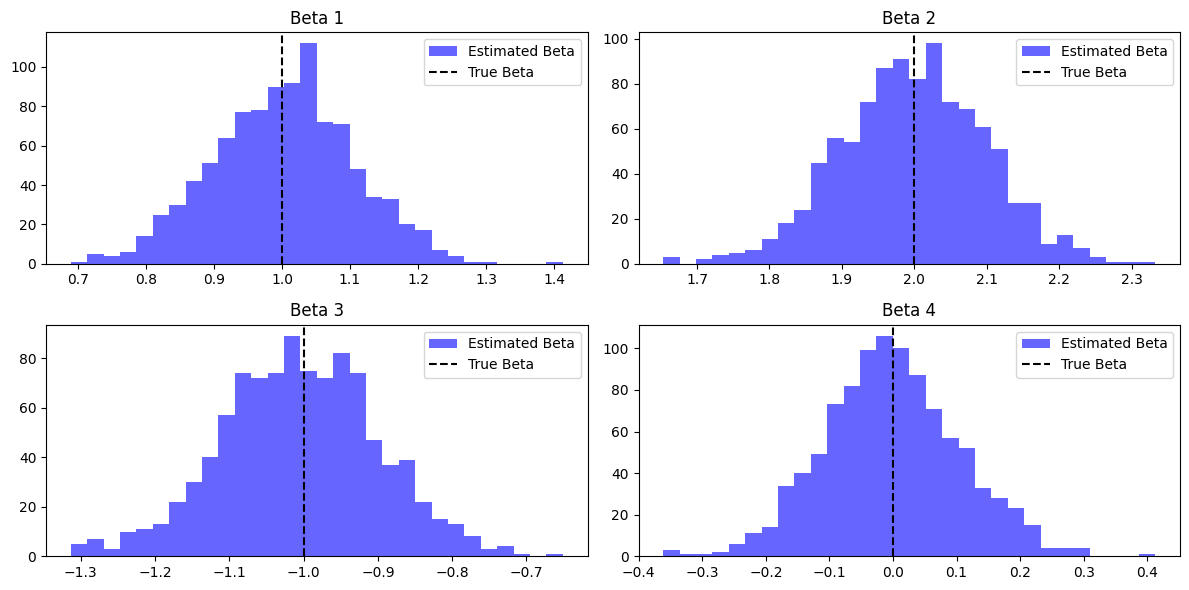

In [ ]:
# your code here (feel free to make more code cells)
import numpy as np


# simulations
num_simulations = 1000

# Initialize an empty array to store the estimated beta values
beta_hat = np.zeros((num_simulations, p))

# True beta values
true_beta = np.array([1, 2, -1, 0])

# features
p = true_beta.shape[0]

# sample size
n = 100

# 100 simulations
for i in range(num_simulations):
    #  random data
    x = np.random.normal(0, 1, [n, p])
    y = x @ true_beta + np.random.normal(0, 1, [n])

    # linear model
    model = LinearRegression().fit(x, y)

    # Save the estimated beta values
    beta_hat[i] = model.coef_



#Histogram Plot
plt.figure(figsize=(12, 6))
for i in range(p):
    plt.subplot(2, 2, i+1)
    plt.hist(beta_hat[:, i], bins=30, alpha=0.6, color='blue', label='Estimated Beta')
    plt.axvline(x=true_beta[i], color='black', linestyle='--', label='True Beta')
    plt.title(f'Beta {i+1}')
    plt.legend()

plt.tight_layout()
plt.show()

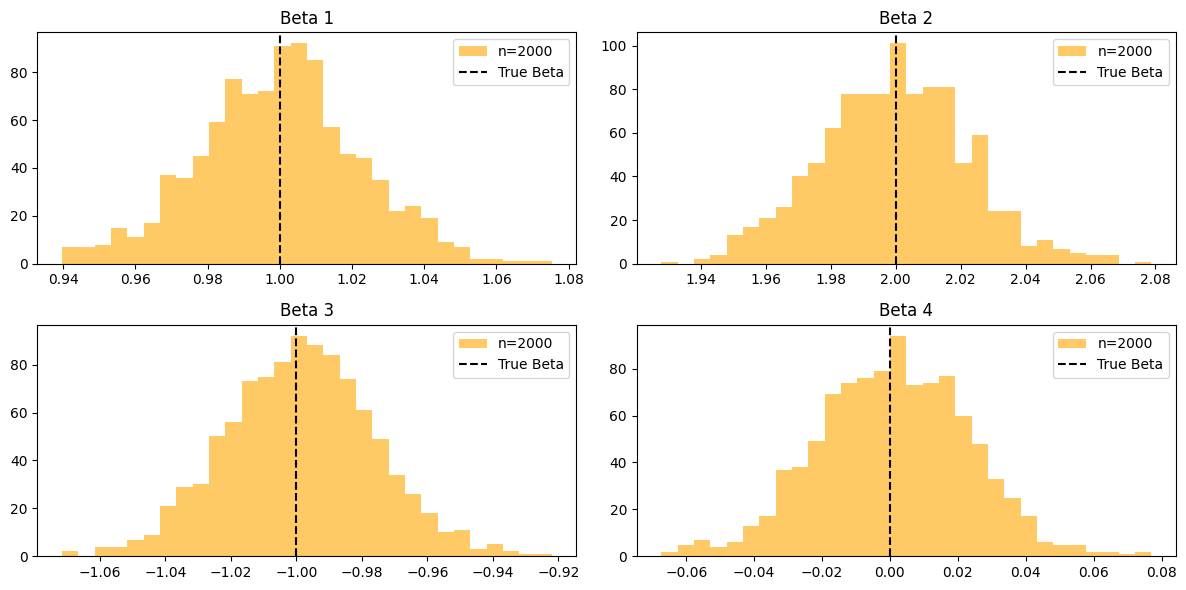

In [ ]:
# empty array to store the estimated beta values for n=2000
beta_hat_n2000 = np.zeros((num_simulations, p))


n = 2000

# 1000 simulations
for i in range(num_simulations):
    x = np.random.normal(0, 1, [n, p])
    y = x @ true_beta + np.random.normal(0, 1, [n])
    model = LinearRegression().fit(x, y)
    beta_hat_n2000[i] = model.coef_

# histograms for n=2000
plt.figure(figsize=(12, 6))
for i in range(p):
    plt.subplot(2, 2, i+1)
    plt.hist(beta_hat_n2000[:, i], bins=30, alpha=0.6, color='orange', label=f'n={n}')
    plt.axvline(x=true_beta[i], color='black', linestyle='--', label='True Beta')
    plt.title(f'Beta {i+1}')
    plt.legend()

plt.tight_layout()
plt.show()



**When the sample size is higher the data is less spread/lower standard error.**

## Part 2. Mean and variance of the parameters

1. Print the mean estimated beta from each simulation study. How closely do these match the true beta vector we generated the data with?

2. Print the variance of the estimated betas from each simluation study. Is the variance increasing or decreasing with sample size?

In [ ]:
# mean across each simulation ()

mean_beta_hat_n2000 = np.mean(beta_hat_n2000, axis=0)
beta_hat_mu = np.mean(beta_hat, axis=0)
# Print the mean estimated beta values
print("Mean Estimated Beta Values for 2000 samples:", mean_beta_hat_n2000)
print()
print("Here are the estimated beta for 100 samples:", beta_hat_mu)





Mean Estimated Beta Values for 2000 samples: [ 9.99862691e-01  1.99966890e+00 -9.98774955e-01  9.22641797e-04]

Here are the estimated beta for 100 samples: [ 1.00300719  1.99831383 -1.00565018 -0.00253603]


**The one with will a great sample size has much greater accuracy and precision.**
**They are both close to the true value of $\beta$ though.**

In [ ]:
# variances
var_beta_hat_n2000 = np.var(beta_hat_n2000, axis=0)
beta_hat_var = np.var(beta_hat, axis=0)
# Print the variance estimated beta values
print("Variance Estimated Beta Values for 2000 samples", var_beta_hat_n2000)
print()
print("Here are the estimated variance for 100 samples:", beta_hat_var)

Variance Estimated Beta Values for 2000 samples [0.00049497 0.00051649 0.00051247 0.00049646]

Here are the estimated variance for 100 samples: [0.01059861 0.01006345 0.01116801 0.01123552]


**Sample size and variance are inversely related. As sample size increase variance decreases.**

# Question 3 - Multicollinearity

In the above problem, we generated all our features _independently_. That is $x_1$ has no influence on $x_2$, $x_2$ has no influence on $x_3, etc. When this _assumption_ holds we saw that the betas were estimated really well!

What happens if the features are not independent?

__Multicollinearity__ is a situation where one predictor can be written as a linear combination of the other predictors. For example, if $x_2 = 0.5 x_1$ then we would say that $x_1$ and $x_2$ are collinear. If $x_3 = x_1 + x_2$ then
$x_1$, $x_2$, and $x_3$ are all collinear with each other. In general, we can see that there is some redundant information being included in the model. If $x_3 = x_1 + x_2$, then $x_3$ isnt providing any information over what $x_1$ and $x_2$ already tell us.

Is this redundancy harmless? No.

Multicollinearity can be a big issue for _training_ models and _interpreting_ their coefficients. Lets see why.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Part 1. Gererate simulation data

1. Generate `n=1000` realizations of three variables `x1`, `x2`, and `x3` where
 - `x1` $\sim$ N(0, 1)
 - `x2` $\sim$ N(0, 1)
 - `x3 = x1 + x2`

 So that `x3` is perfectlly collinear with `x1` and `x2`.


2. Stack these variables into a single data matrix `x` (should have 1000 rows and 3 columns).

3. Compute `y = x @ beta + np.random.normal(0, 1 n)` to generate the response with the provided beta vector

4. Create a `1x3` array of scatter plots showing `y` vs each covariate.


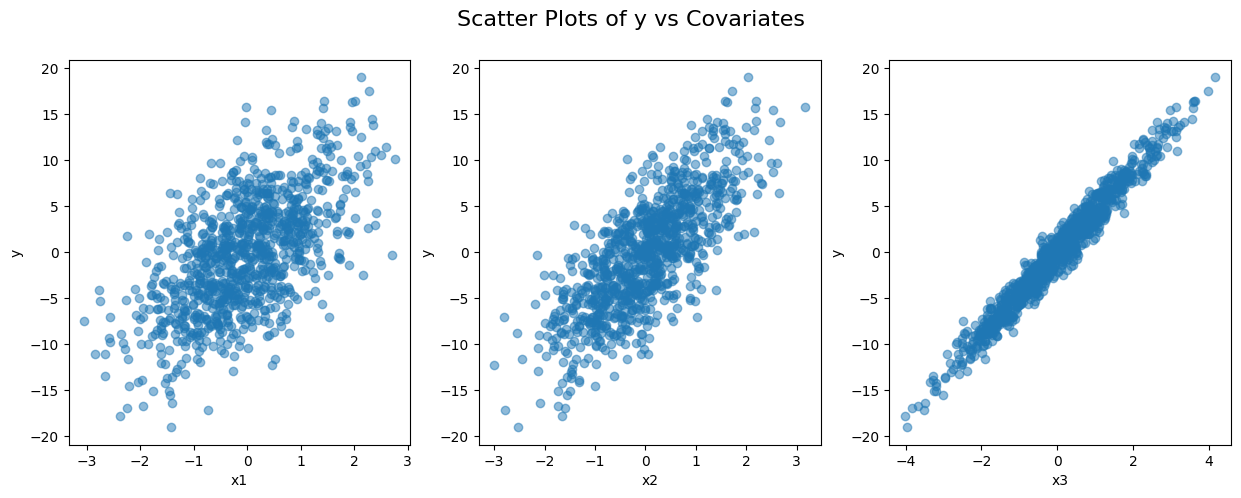

In [ ]:
# your code here (feel free to make more code cells)
# set the seed
np.random.seed(0)

# Generate 1000 realizations of x1 and x2
n = 1000
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)

# x3 is collinear with x1 and x2
x3 = x1 + x2

# Stack the variables into a single data matrix x
x = np.column_stack((x1, x2, x3))

# beta vector
beta = np.array([1, 2, 3])

# Generate the response variable y
y = x @ beta + np.random.normal(0, 1, n)

# scatter plots of y vs each covariate (x1, x2, x3)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Scatter Plots of y vs Covariates', fontsize=16)

for i, covariate in enumerate(['x1', 'x2', 'x3']):
    axs[i].scatter(x[:, i], y, alpha=0.5)
    axs[i].set_xlabel(covariate)
    axs[i].set_ylabel('y')

plt.show()

## Part 2. Check Linear model fit

1. Split the data into training and testing sets. Use a test size of 0.33 and a random state of 42.

2. Fit a linear regression on the training data

3. Print the coefficients and the MSE on the testing data
  - if the coefficients are close to infinity re-generate the data until you have finite numbers
  - should be between 0 and 2

4. Comment: Are these estimated coefficients close to the true coefficients?

In [ ]:
# your code here (feel free to make more code cells)
while True:
    # Generate 1000 realizations of x1 and x2
    n = 1000
    x1 = np.random.normal(0, 1, n)
    x2 = np.random.normal(0, 1, n)

    #  x3 as the sum of x1 and x2
    x3 = x1 + x2

    # Stack the variables into a single data matrix x
    x = np.column_stack((x1, x2, x3))

    # true beta vector
    beta = np.array([1, 1, 1])

    #response variable y
    y = x @ beta + np.random.normal(0, 1, n)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

    # Initialize the linear regression model and fit it to the training data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Get the coefficients of the model
    coefficients = model.coef_

    # Calculate the MSE on the testing data
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Check if coefficients are close to infinity or outside the [0, 2] range
    if all(0 <= coefficients) and all(coefficients <= 2):
        break

print("Coefficients:", coefficients)
print("MSE on testing data:", mse)

Coefficients: [0.64829437 0.69468704 1.34298141]
MSE on testing data: 0.9555176903100826


In [ ]:
print("Coefficients:", coefficients)

Coefficients: [0.64829437 0.69468704 1.34298141]


I would not consider these estimated coefficents close to the true coefficients. The closest estimate is .3 away from the true value.

## Part 3. Compare with reduced model

1. Create a new data matrix `x_reduced` that consists of only `x1` and `x2`.

2. Compute `y_reduced = x_reduced @ beta + np.random.normal(0, 1 n)` to generate the response with the provided beta vector

3. Split the data into training and testing datasets again using a test size of 0.33 and a random state of 42

4. Fit a linear model, print the coefficients and the test MSE

5. Comment: Are these model coefficients different from before? How does the test MSE compare to the previous model? Summarize the impact of multicollinearity on this model in terms of coefficient estimation and prediction error.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate 1000 realizations of x1 and x2
n = 1000
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)

# Compute x3 as the sum of x1 and x2
x3 = x1 + x2

# Stack the variables into a single data matrix x
x = np.column_stack((x1, x2, x3))

# Define the true beta vector
true_beta = np.array([1, 1, 1])

# Generate the response variable y using true_beta
y = x @ true_beta + np.random.normal(0, 1, n)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Initialize the linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Create a new data matrix x_reduced with only x1 and x2
x_reduced = x[:, :2]

# Define the reduced beta vector with length 2
true_beta_reduced = np.array([1, 1])

# Generate the response variable y_reduced using x_reduced and true_beta_reduced
y_reduced = x_reduced @ true_beta_reduced + np.random.normal(0, 1, n)

# Split the reduced data into training and testing sets
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y_reduced, test_size=0.33, random_state=42)

# Initialize a linear regression model and fit it to the reduced training data
model_reduced = LinearRegression()
model_reduced.fit(X_train_reduced, y_train_reduced)

# Get the coefficients of the reduced model
coefficients_reduced = model_reduced.coef_

# Calculate the test MSE of the reduced model
y_pred_reduced = model_reduced.predict(X_test_reduced)
mse_reduced = mean_squared_error(y_test_reduced, y_pred_reduced)

# Print coefficients and test MSE for both models
print("True Beta:", true_beta)
print("Coefficients:", coefficients)
print("MSE on testing data:", mse)
print("Reduced Model - Coefficients:", coefficients_reduced)
print("Reduced Model - Test MSE:", mse_reduced)


True Beta: [1 1 1]
Coefficients: [0.64829437 0.69468704 1.34298141]
MSE on testing data: 0.9555176903100826
Reduced Model - Coefficients: [1.03611688 0.97398072]
Reduced Model - Test MSE: 0.9877741676509892


The reduced model's coefficient are much closer to the true betas.

## Part 4. Checking for multicollinearity

How can we check if multicollinearity is occuring? We can see that in some sense multicollinearity may not matter, but in others it matters a great deal! There are many methods that have been developed to test for multicollinearity in a dataset. We will use the simplest approach which is a simple eyeball test.

1. Generate `n=1000` realizations of three variables `x1`, `x2`, and `x3` where
 - `x1` $\sim$ N(0, 1)
 - `x2` $\sim$ N(0, 1)
 - `x3 = x1 + x2`

 So that `x3` is perfectlly collinear with `x1` and `x2`.

2. Create a 1x3 panel of plots showing each covariate plotted against the others. Comment: What do you notice about these plots? What do they show us about the correlation between variables?

3. Print the correlation coefficient for each variable combination. Which variables are highly correlated?


_Note: more sophiticated approaches involve inspecting variance inflation factors_ https://online.stat.psu.edu/stat462/node/180/

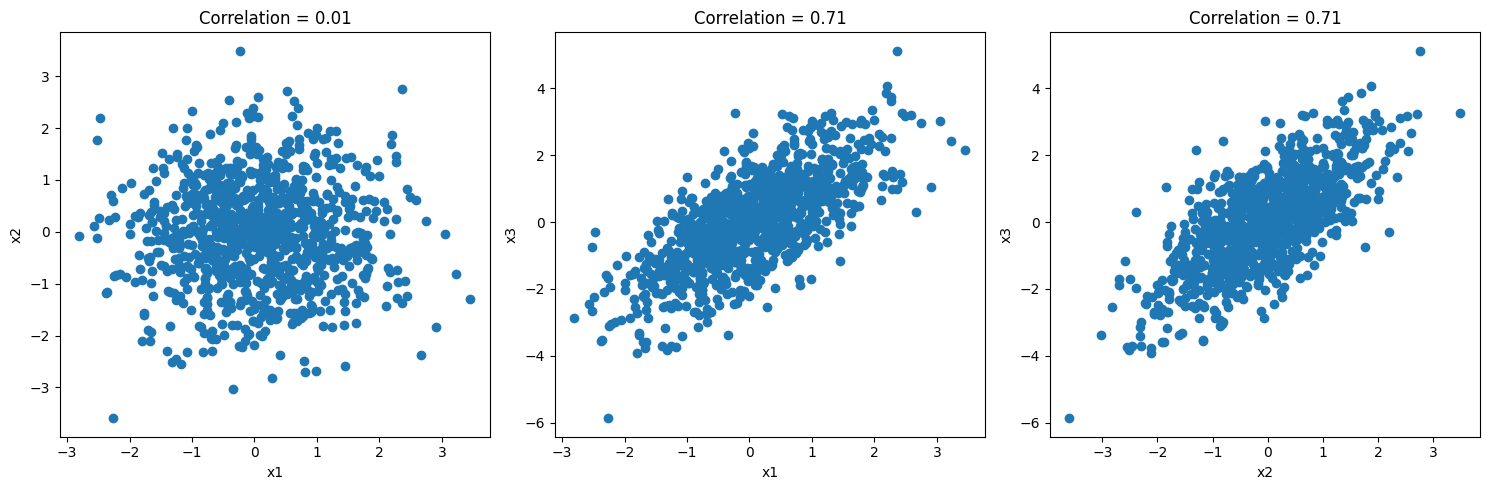

Correlation x1-x2: 0.012937183487861475
Correlation x1-x3: 0.7098756484945111
Correlation x2-x3: 0.7134518761169983


In [ ]:
# Generate 1000 realizations of x1 and x2
n = 1000
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)

# Compute x3 as the sum of x1 and x2
x3 = x1 + x2

# Calculate the correlation coefficients
corr_x1_x2 = np.corrcoef(x1, x2)[0, 1]
corr_x1_x3 = np.corrcoef(x1, x3)[0, 1]
corr_x2_x3 = np.corrcoef(x2, x3)[0, 1]

# Create a 1x3 panel of plots
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'Correlation = {corr_x1_x2:.2f}')

plt.subplot(132)
plt.scatter(x1, x3)
plt.xlabel('x1')
plt.ylabel('x3')
plt.title(f'Correlation = {corr_x1_x3:.2f}')

plt.subplot(133)
plt.scatter(x2, x3)
plt.xlabel('x2')
plt.ylabel('x3')
plt.title(f'Correlation = {corr_x2_x3:.2f}')

plt.tight_layout()
plt.show()

# Print correlation coefficients
print("Correlation x1-x2:", corr_x1_x2)
print("Correlation x1-x3:", corr_x1_x3)
print("Correlation x2-x3:", corr_x2_x3)


The most correlated are x2 and x3 and x1 and x3 are very closely correlated.     
The first plot (x1 vs. x2) shows a scatter plot of x1 against x2. Since both x1 and x2 are generated independently from the same normal distribution, there is no strong linear relationship between them.

The second plot (x1 vs. x3) shows a scatter plot of x1 against x3. Here, you can observe a strong linear relationship, as x3 is defined as the sum of x1 and x2. Therefore, x1 and x3 are highly correlated.

The third plot (x2 vs. x3) shows a scatter plot of x2 against x3. Similar to the second plot, x2 and x3 also exhibit a strong linear relationship.

# Question 4 - High Dimensional regression

In question 3, we saw how linear regression can go wrong if there is severe collinearity between variables.

Many regression problems assume that the number of predictors $p$ is smaller than the number of samples $n$. What happens if $p > n$?

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split

## Part 1. Generate simulation data

1. Generate `n = 100` samples from `p = 200` independent standard normals (hint: you can do this with a single call to `np.random.normal()`) to get an $n \times p$ data matrixd called `x`.

2. Compute the response `y` with the provided beta vector `beta` as `y = x @ beta + np.random.normal(0, 1, n)`

3. Fit a linear regession and plot a histogram of the coefficients. Comment: Do these coefficients center around the true `beta`s (all 1s)?

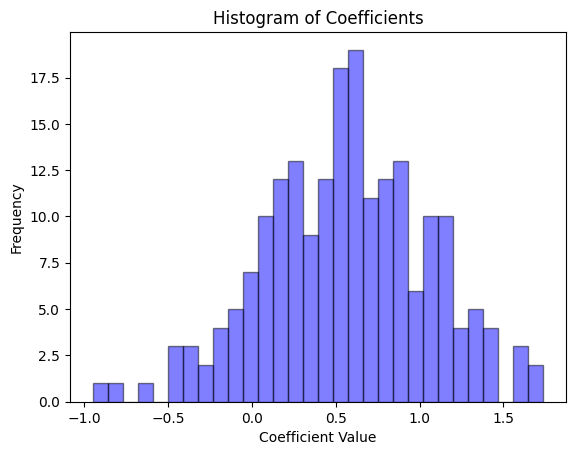

Mean of Coefficients: 0.5601179355292989


In [ ]:
# your code here (feel free to make more code cells)
n = 100  # Number of samples
p = 200  # Number of predictors

# Generate the predictors matrix
x = np.random.normal(0, 1, size=(n, p))

# True beta vector (all 1s)
beta = np.ones(p)

# Generate the response variable
y = x @ beta + np.random.normal(0, 1, n)

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)

# Get the coefficients from the model
coefficients = model.coef_

# Plot a histogram of the coefficients
plt.hist(coefficients, bins=30, alpha=0.5, color='b', edgecolor='black')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.title('Histogram of Coefficients')
plt.show()

# Check if coefficients center around the true betas (all 1s)
mean_coefficients = np.mean(coefficients)
print("Mean of Coefficients:", mean_coefficients)

No, these coefficients do **not** center around the true betas (all 1s).

## Part 2. Repeat with even higher dimensional data

Repeat the above with `p = 1000` now. Plot the estimated beta distribution (histogram) from the first model (where `p = 200`) against the new beta distribution (histogram). Overlay these two histograms on top of each other. Comment: What is the difference in the two distributions?

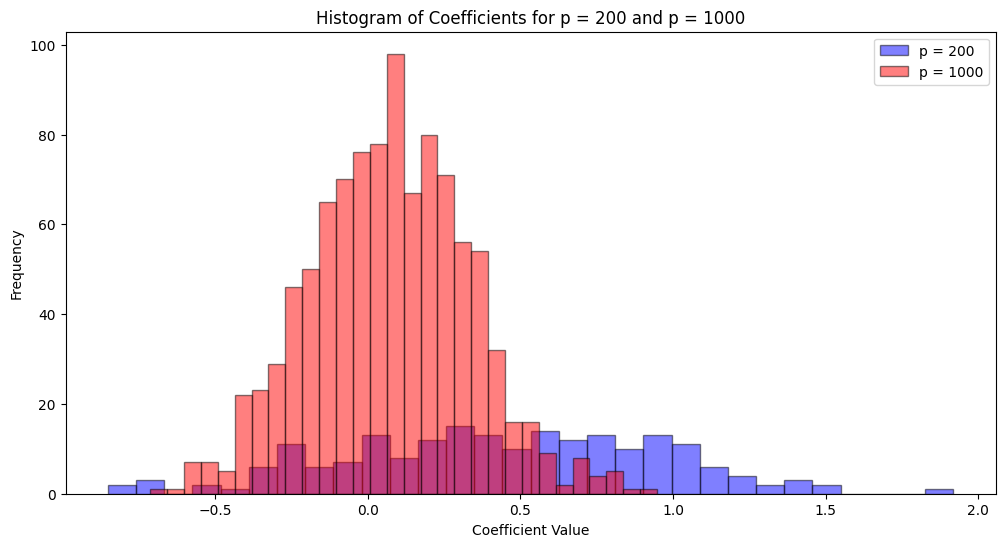

In [ ]:
# your code here (feel free to make more code cells)

n = 100  # Number of samples

# For p = 200
p_200 = 200  # Number of predictors
x_200 = np.random.normal(0, 1, size=(n, p_200))
beta_200 = np.ones(p_200)
y_200 = x_200 @ beta_200 + np.random.normal(0, 1, n)

# Fit a linear regression model for p = 200
model_200 = LinearRegression()
model_200.fit(x_200, y_200)
coefficients_200 = model_200.coef_

# For p = 1000
p_1000 = 1000  # Number of predictors
x_1000 = np.random.normal(0, 1, size=(n, p_1000))
beta_1000 = np.ones(p_1000)
y_1000 = x_1000 @ beta_1000 + np.random.normal(0, 1, n)

# Fit a linear regression model for p = 1000
model_1000 = LinearRegression()
model_1000.fit(x_1000, y_1000)
coefficients_1000 = model_1000.coef_

# Plot of coefficients for p = 200 and p = 1000
plt.figure(figsize=(12, 6))
plt.hist(coefficients_200, bins=30, alpha=0.5, color='b', edgecolor='black', label='p = 200')
plt.hist(coefficients_1000, bins=30, alpha=0.5, color='r', edgecolor='black', label='p = 1000')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.title('Histogram of Coefficients for p = 200 and p = 1000')
plt.legend()
plt.show()

No, these coefficients do not center around the true betas (all 1s).

## Part 3. Apply Lasso

In class we mentioned that regularized regression models like Ridge and Lasso can improve estimation when $p > n$.

1. Comment: Why will Lasso probably not help here?

2. Rerun the above model (with `p = 1000`) using Lasso instead of LinearRegression anyways. Plot the estimated coefficient distribution and compare with the LinearRegression model. You must choose your own regularization parameter.


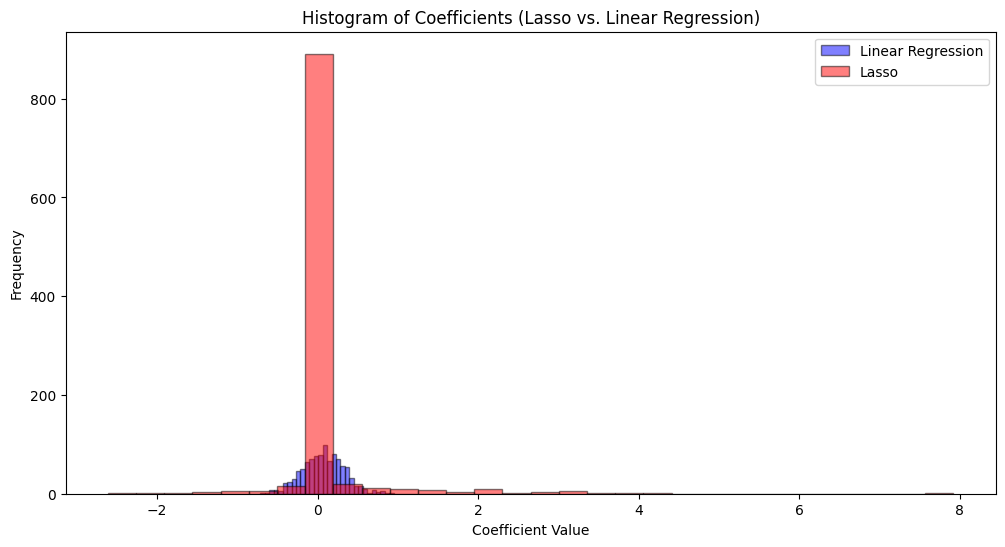

In [ ]:
from sklearn.linear_model import Lasso


n = 100  # Number of samples
p = 1000  # Number of predictors

# Generate the predictor matrix
x = np.random.normal(0, 1, size=(n, p))
beta = np.ones(p)
y = x @ beta + np.random.normal(0, 1, n)

# Fit a Lasso regression model
alpha = 0.01
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(x, y)
lasso_coefficients = lasso_model.coef_

# Plot histograms
plt.figure(figsize=(12, 6))
plt.hist(coefficients_1000, bins=30, alpha=0.5, color='b', edgecolor='black', label='Linear Regression')
plt.hist(lasso_coefficients, bins=30, alpha=0.5, color='r', edgecolor='black', label='Lasso')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.title('Histogram of Coefficients (Lasso vs. Linear Regression)')
plt.legend()
plt.show()

Lasso will not help here; Lasso sparsely selects only part of the covariates

## Part 4. Sparse regression

Lets look at situation where Lasso can help and compare against linear regression. We will generate a sparse coefficient vector, that is a `beta` vector where most of the entries are 0. In situations like this, Lasso and Ridge can help identify variables that have a coefficient of 0 (i.e. they are unimportant).

1. Generate a random "data matrix" drawn from a standard normal, which has $n = 100$ rows and $p = 1000$ columns.

2. Use the provided sparse `beta` vector to compute `y` from `x`.

3. Fit Lasso with a regularization parameter between $0.5$ and $1.5$. Which coefficients were identified as 0 and none 0? Are the correct coefficients identified? How does this change as you increase or decrease the penalization parameter?

In [ ]:
n = 100  # Number of samples
p = 1000  # Number of predictors

# Generate the data matrix (n x p) from standard normal distribution
x = np.random.normal(0, 1, size=(n, p))

# Create a sparse beta vector with 5 non-zero coefficients
beta = np.concatenate([np.ones(5), np.zeros(p-5)])

# Generate the response variable y using the sparse beta vector
y = x @ beta + np.random.normal(0, 1, n)

# Fit Lasso models with different alphas
alpha_values = [0.5, 1.0, 1.5]
coefficients = []

for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(x, y)
    coefficients.append(lasso_model.coef_)

# Fit a Linear Regression model for comparison
linear_model = LinearRegression()
linear_model.fit(x, y)
linear_coefficients = linear_model.coef_

# Identify which coefficients are set to 0 for each Lasso model
zero_coefficients = []

for i, alpha in enumerate(alpha_values):
    zero_indices = np.where(coefficients[i] == 0)[0]
    zero_coefficients.append(zero_indices)

# Compare results
for i, alpha in enumerate(alpha_values):
    print(f"Results for Lasso (alpha={alpha}):")
    print("Non-zero coefficients identified by Lasso:", np.where(coefficients[i] != 0)[0])
    print("Zero coefficients identified by Lasso:", zero_coefficients[i])
    print("Linear Regression coefficients:", np.where(linear_coefficients != 0)[0])
    print("\n")

Results for Lasso (alpha=0.5):
Non-zero coefficients identified by Lasso: [  0   1   2   3   4  95 383 675 983]
Zero coefficients identified by Lasso: [  5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 2

In [ ]:
# your code here (feel free to make more code cells)

As you increase the penalization parameter (alpha), Lasso becomes more aggressive in setting coefficients to zero.

# Question 5 - Optimize your own model

So far we have used sklearn to fit models for us. Let make sure we have some idea of what its doing. We will write our own model and loss functions then use scipys optimization procedures to find the optimal model.

We will demonstrate this on the diabetes dataset, which has been imported below.




In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

diabetes = datasets.load_diabetes(as_frame=True)
x, y = diabetes.data, diabetes.target
y -= np.mean(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## Part 1. Check sklearn's solution

1. Fit a linear regression model using sklean to the training data
2. Compute and print the train and test MSEs
3. Print the estimated beta coefficients
4. Comment: Does this model do a good job extrapolating from train to test?

In [ ]:
# your code here (feel free to make more code cells)
# Fit a linear regression model to the training data
model = LinearRegression()
model.fit(x_train, y_train)

# Predict the target values for the training and test data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Compute and print the Mean Squared Errors (MSE) for train and test data
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

# estimated beta coefficients
print("Estimated Beta Coefficients:", model.coef_)


Train MSE: 2949.291573722149
Test MSE: 2817.808297221584
Estimated Beta Coefficients: [  32.14928032 -242.82449076  559.98996952  407.63766881 -718.69857577
  396.63703933   10.432395    171.81955335  627.07993787  -21.62312454]


The linear regression model appears to do a reasonably good job extrapolating from the training data to the test data because the mse of the training is higher than test.

## Part 2. Write a model function

If `beta` is a length `p` vector and `x` is an `n x p` matrix, then we can compute `yhat = x @ beta` to estimate `y`.

1. Write a function called `model` that takes a data matrix `x` and a parameter vector `beta` and returns `yhat`.
2. Check that it works by feeding it `xtest` and the beta coefficients sklean estimated. Check that the predictions of your function match those of `lm.predict()`

In [ ]:
def model(x, beta):
    return np.dot(x, beta)

# Load the diabetes dataset
diabetes = datasets.load_diabetes(as_frame=True)
x, y = diabetes.data, diabetes.target
y -= np.mean(y)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Fit a Linear Regression model
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

# Get the beta coefficients estimated by Linear Regression
beta_lr = model_lr.coef_

# Use your model function to make predictions
yhat_custom = model(x_test, beta_lr)

# redict method of the Linear Regression model
yhat_lr = model_lr.predict(x_test)

# Compare predictions from both methods
print("Custom Model Predictions (yhat_custom):", yhat_custom[:5])
print("Linear Regression Model Predictions (yhat_lr):", yhat_lr[:5])



Custom Model Predictions (yhat_custom): [-11.34622668  34.30468834 -18.82447973 134.47541802 -27.78487635]
Linear Regression Model Predictions (yhat_lr): [-13.04569861  32.60521641 -20.52395167 132.77594609 -29.48434828]


**They don't match exactly but they are very close.**

## Part 3. Write a loss function

1. Write a loss function called `mse_loss()` that takes as input a coefficient vector `beta`, a matrix of covariates `x`, and a vector of targets `y` and computes the mean squared error of a linear model with coefficients `beta`.

2. Check that your function works by feeding it `xtest`, `ytest`, and sklearns estimated `beta` vector and checking that it matches the test MSE you computed above.

In [ ]:
# Mean Squared Error (MSE) loss function
def mse_loss(beta, x, y):
    # Compute predictions yhat
    yhat = np.dot(x, beta)

    # Compute the squared differences
    squared_errors = (yhat - y) ** 2

    # Calculate the mse
    mse = np.mean(squared_errors)

    return mse


# Calculate the MSE using mse_loss function
test_mse_custom = mse_loss(beta_lr, x_test, y_test)

# Print and compare the custom MSE with the previous test MSE
print("Custom MSE using mse_loss function:", test_mse_custom)
print("MSE computed above", test_mse)



Custom MSE using mse_loss function: 2803.209015195156
MSE computed above 2817.808297221584


The custom MSE and previous ones are very close. They do not exactly match.

## Part 4. Optimize

Use scipy's optimize function (imported below) to estimate the optimal beta parameters.

1. First generate an initial guess called `beta0`.
2. Use optimize to find the beta vector that minimizes `mse_loss`. Save this result as `beta_hat`
3. print `beta_hat` and compare them with the `beta` vector estimated by sklearn. Also compute the train and test MSE.
4. Comment: Is the beta vector you estimated the close to one estimated by sklearn?

In [ ]:
from scipy.optimize import minimize

In [ ]:
# your code here (feel free to make more code cells)

# initial guess for beta0
beta0 = np.zeros(x_train.shape[1])  # Initialize with zeros

# find the optimal beta_hat
beta_hat = minimize(mse_loss, beta0, args=(x_train, y_train)).x

# Linear REgression for comparison
model = LinearRegression()
model.fit(x_train, y_train)
beta_lr = model.coef_

# Calculate train and test MSE using beta_hat
y_train_pred_hat = np.dot(x_train, beta_hat)
y_test_pred_hat = np.dot(x_test, beta_hat)
train_mse_hat = mean_squared_error(y_train, y_train_pred_hat)
test_mse_hat = mean_squared_error(y_test, y_test_pred_hat)

# Print beta_hat and compare with beta_lr
print("Estimated Beta Coefficients that I estimated (beta_hat):", beta_hat)
print("Estimated Beta Coefficients using scikit-learn (beta_lr):", beta_lr)

# Print train and test MSE
print("Train MSE (beta_hat):", train_mse_hat)
print("Test MSE (beta_hat):", test_mse_hat)

Estimated Beta Coefficients that I estimated (beta_hat): [  31.60005531 -243.0621113   558.54861231  407.7857469  -724.04627189
  400.94069286   11.79960995  172.87526101  629.02901807  -22.83005952]
Estimated Beta Coefficients using scikit-learn (beta_lr): [  32.14928032 -242.82449076  559.98996952  407.63766881 -718.69857577
  396.63703933   10.432395    171.81955335  627.07993787  -21.62312454]
Train MSE (beta_hat): 2952.169286338273
Test MSE (beta_hat): 2803.922391428029


The beta_hat I estimated is close to the one using sklearn.